In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_raw = pd.read_csv('DATASET.csv')
df = df_raw.copy()

In [4]:
print('Dataset')
print('-'*100)
display(df)

print('-'*100)
print(df.info())

Dataset
----------------------------------------------------------------------------------------------------


,First_pokemon,Second_pokemon,Winner,Name_P1,HP_P1,Attack_P1,Defense_P1,Generation_P1,Legendary_P1,Name_P2,...,p2_japanese_name,p2_name,p2_percentage_male,p2_pokedex_number,p2_sp_attack,p2_sp_defense,p2_speed,p2_type1,p2_type2,p2_weight_kg
0,266,298,298.0,Larvitar,50,64,50,II,False,Nuzleaf,...,Konohanaコノハナ,Nuzleaf,50.0,274.0,60.0,40.0,60.0,grass,dark,28.0
1,702,701,701.0,Virizion,91,90,72,V,True,Terrakion,...,Terrakionテラキオン,Terrakion,NaN,639.0,72.0,90.0,108.0,rock,fighting,260.0
2,191,668,668.0,Togetic,55,40,85,II,False,Beheeyem,...,Ohbemオーベム,Beheeyem,50.0,606.0,125.0,95.0,40.0,psychic,NaN,34.5
3,237,683,683.0,Slugma,40,40,40,II,False,Druddigon,...,Crimganクリムガン,Druddigon,50.0,621.0,60.0,90.0,48.0,dragon,NaN,139.0
4,151,231,151.0,Omastar,70,60,125,I,False,Shuckle,...,Tsubotsuboツボツボ,Shuckle,50.0,213.0,10.0,230.0,5.0,bug,rock,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50250,707,126,707.0,Reshiram,100,120,100,V,True,Horsea,...,Tattuタッツー,Horsea,50.0,116.0,70.0,25.0,60.0,water,NaN,8.0
50251,589,664,589.0,Drilbur,60,85,40,V,False,Tynamo,...,Shibishirasuシビシラス,Tynamo,50.0,602.0,45.0,40.0,60.0,electric,NaN,0.3
50252,303,368,368.0,Pelipper,60,50,100,III,False,Zangoose,...,Zangooseザングース,Zangoose,50.0,335.0,60.0,60.0,90.0,normal,NaN,40.3
50253,109,89,109.0,Voltorb,40,30,50,I,False,Magnemite,...,Coilコイル,Magnemite,NaN,81.0,95.0,55.0,45.0,electric,steel,6.0


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50255 entries, 0 to 50254
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   First_pokemon         50255 non-null  int64  
 1   Second_pokemon        50255 non-null  int64  
 2   Winner                50255 non-null  float64
 3   Name_P1               50199 non-null  object 
 4   HP_P1                 50255 non-null  int64  
 5   Attack_P1             50255 non-null  int64  
 6   Defense_P1            50255 non-null  int64  
 7   Generation_P1         50255 non-null  object 
 8   Legendary_P1          50255 non-null  bool   
 9   Name_P2               50203 non-null  object 
 10  HP_P2                 50255 non-null  int64  
 11  Attack_P2             50255 non-null  int64  
 12  Defense_P2            50255 non-null  int64  
 13  Generation_P2       

## **BOXPLOT**

Vẽ Boxplot các biến số định lượng liên tục hoặc bán liên tục để tìm kiếm giá trị ngoại lệ và sự phân bố lệch

In [6]:
def plot_boxplots(df: pd.DataFrame, stats, cols=3):

    n = len(stats)
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    for i, stat in enumerate(stats):

        ax = axes[i]
        sns.boxplot(
            y=df[stat],
            ax=ax,
            color='C0',    
            width=0.3, 
            fliersize=3
        )

        ax.set_title(f'Boxplot {stat}', fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('Value')

        ax.grid(False)  

    for j in range(i + 1, rows * cols):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
    plt.close()


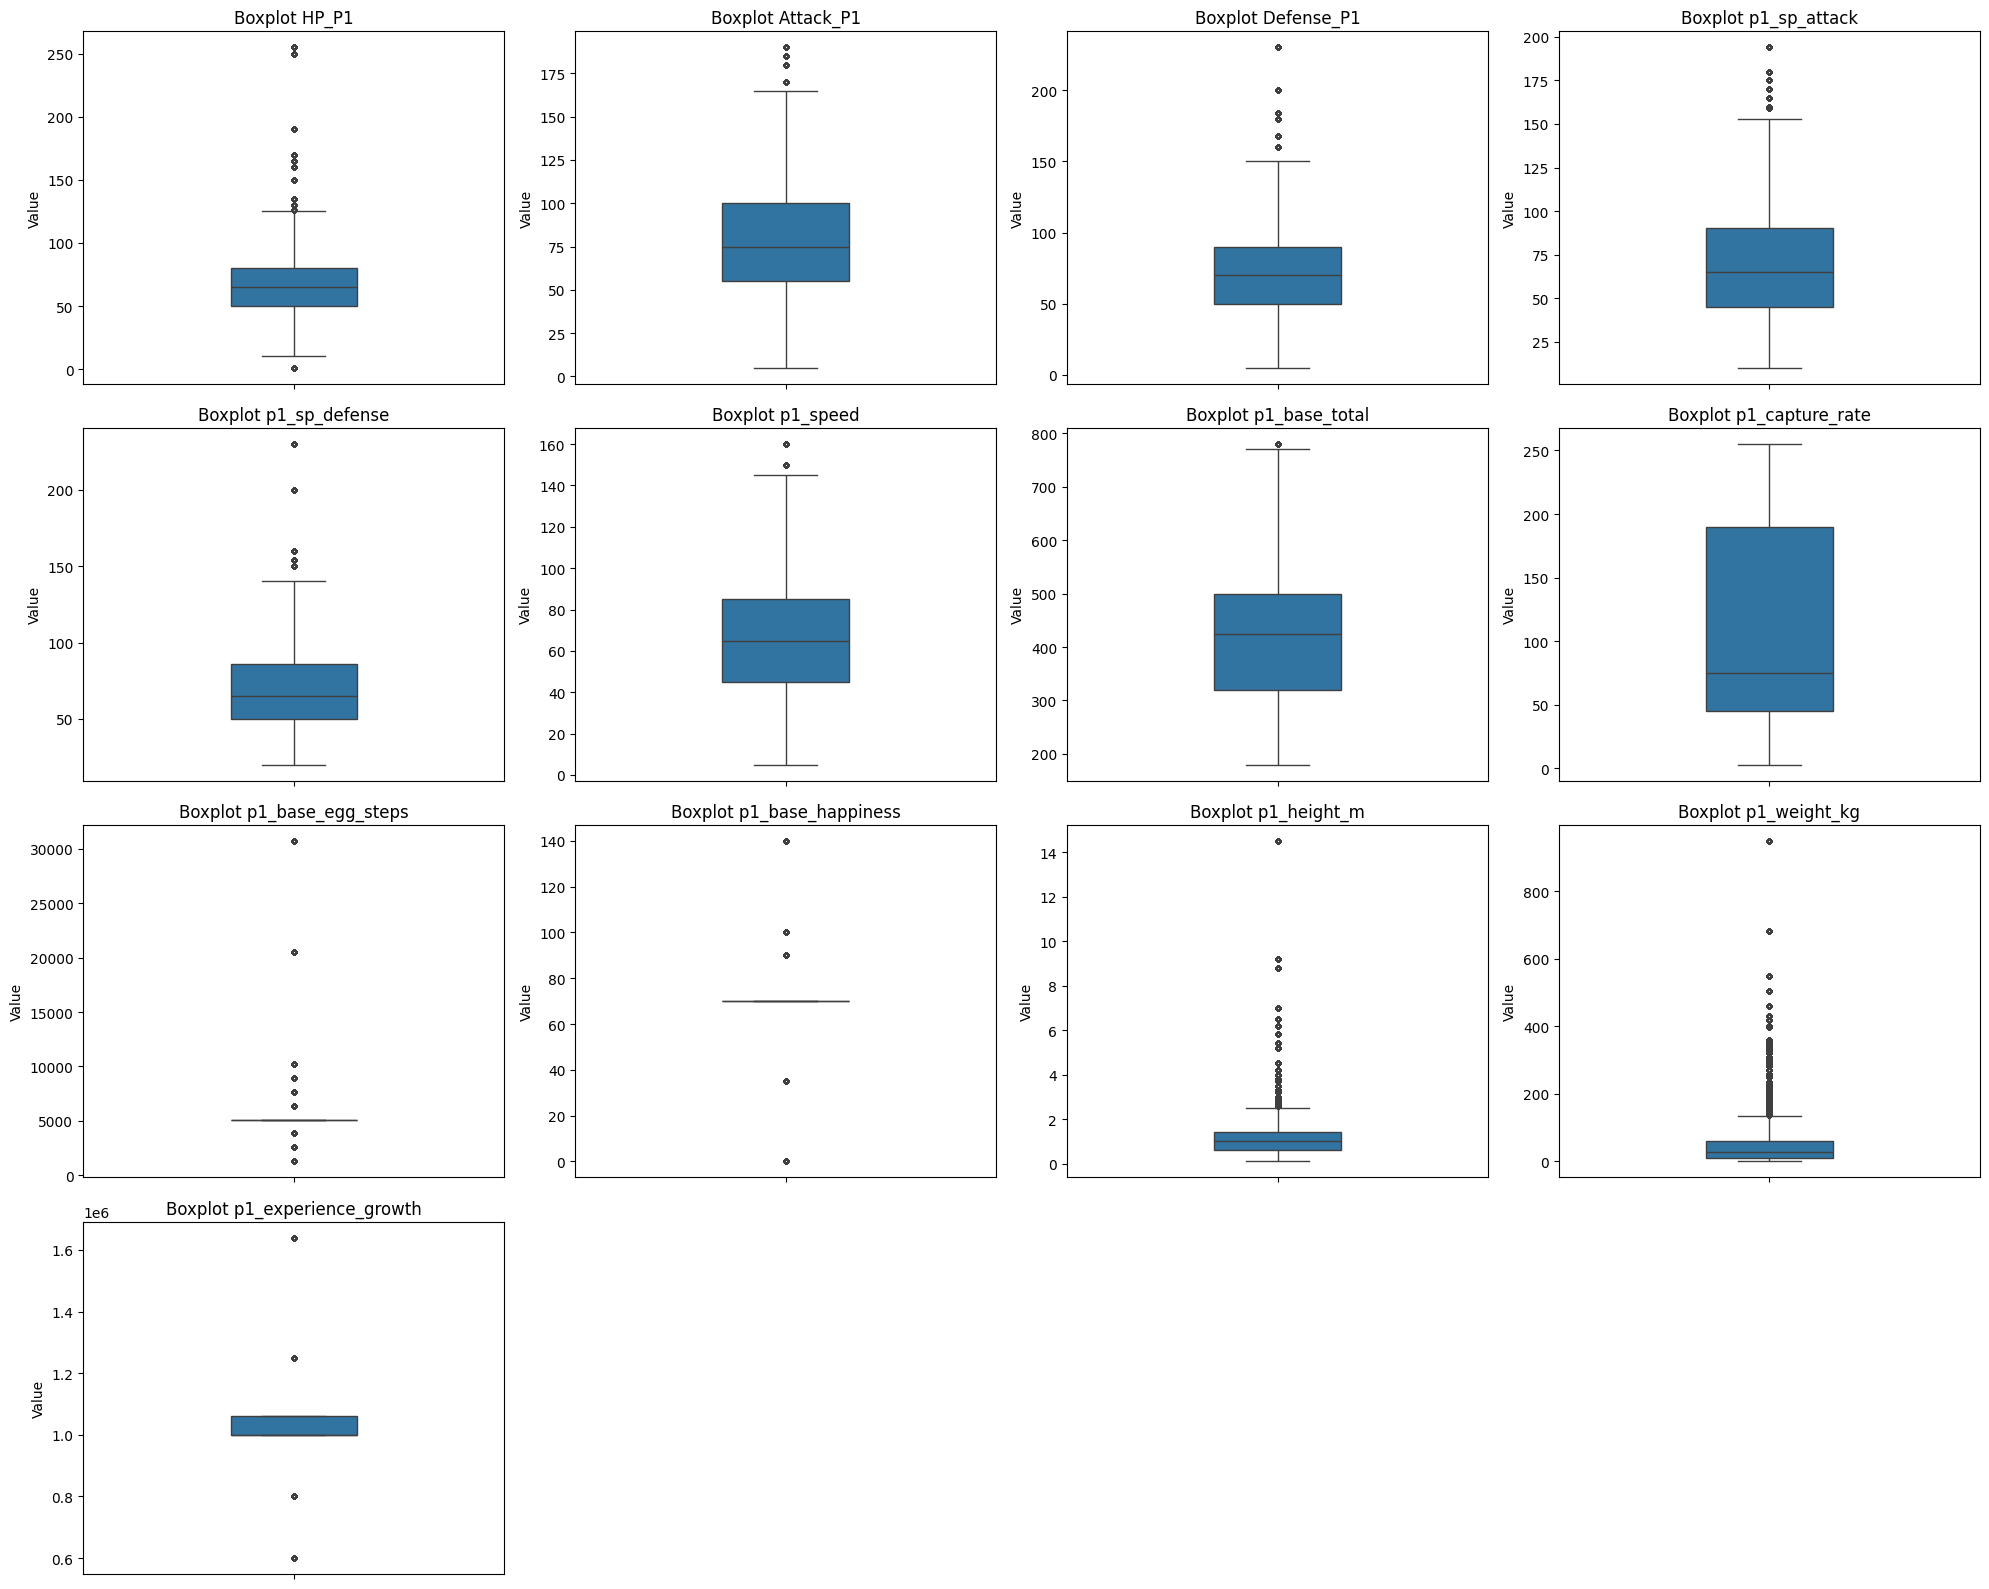

In [7]:
stats = [
    'HP_P1', 'Attack_P1', 'Defense_P1', 'p1_sp_attack', 'p1_sp_defense', 'p1_speed', 
    'p1_base_total', 'p1_capture_rate', 
    'p1_base_egg_steps', 'p1_base_happiness', 'p1_height_m', 'p1_weight_kg', 'p1_experience_growth'
]

plot_boxplots(df, stats, cols=4)

### 1. Outliers trong Chỉ số Chiến đấu Cốt lõi (Core Combat Stats)

Tất cả các chỉ số chiến đấu cơ bản (`HP`, `Attack`, `Defense`, `Sp. Attack`, `Sp. Defense`, `Speed`, `Base Total`) đều thể hiện một mô hình outlier rất nhất quán:

* **Outlier Cao Rõ Rệt:** Hầu hết các outliers đều nằm ở phía trên (giá trị cao), đặc biệt rõ ràng ở **`TotalStats_P1`** (lên tới ~780) và **`Defense_P1`** (lên tới ~230).
* **Ý nghĩa:** Sự tồn tại của các outliers cao này là bằng chứng rõ ràng về **sự phân cấp sức mạnh không cân bằng** trong dữ liệu. Nhóm outliers này đại diện cho **Pokémon Huyền thoại, Mythical, hoặc Pseudo-Legendary**.
* **Vấn đề đối với Model:** Nếu sử dụng trực tiếp vào mô hình, các outliers này sẽ **kéo lệch (bias)** trung bình và độ phương sai, khiến mô hình học được mối quan hệ không chính xác cho đại đa số Pokémon ở mức trung bình.

### 2. Outliers trong Thuộc tính Hệ thống và Sinh học

Các outliers trong nhóm này cho thấy các **mức giá trị đặc biệt** được thiết lập theo cơ chế game, không phải là giá trị liên tục:

| Chỉ số | Vấn đề Outlier | Ảnh hưởng đến Model |
| :--- | :--- | :--- |
| **`p1_base_egg_steps`** | Nhiều outliers cao (tối đa ~30,000). | Phân bố **lệch phải nặng (high skewness)**. Việc đưa các outliers này vào mô hình tuyến tính mà không biến đổi logarit sẽ làm giảm hiệu suất. |
| **`p1_experience_growth`** | Outliers hai phía (rất cao và rất thấp). | Biểu đồ này thực chất đang hiển thị các **mức tăng trưởng rời rạc** (Fast, Medium, Slow). Sử dụng giá trị thô thay vì mã hóa (encoding) sẽ làm giảm khả năng dự đoán của mô hình. |
| **`p1_base_happiness`** | Outliers cao (100, 140) và thấp (0, 35). | **Dữ liệu thô rất rời rạc (sparse)**. Trung vị tập trung tuyệt đối tại 70. Đây là biến số nên được **chuyển thành định tính (categorical)**, vì các giá trị 0, 35, 70, 140 là các điểm mốc có ý nghĩa cơ chế game. |
| **`p1_weight_kg` / `p1_height_m`** | Có outliers cao (ví dụ: `Weight` lên tới ~900kg). | Tương tự như chỉ số chiến đấu, các outliers này (như Wailord, Celesteela) có thể **gây nhiễu** mối quan hệ giữa kích thước và sức mạnh nếu không được chuẩn hóa. |
| **`p1_capture_rate`** | **Box rất rộng** (gần như bao trùm toàn bộ phạm vi). | Mặc dù không có nhiều chấm tròn outliers, sự **phân bố rộng** cho thấy biến số này **không tập trung** và là tập hợp của nhiều mức bắt giữ cố định (ví dụ: 3, 45, 120, 190, 255). Dữ liệu này **rất thô** và cần được binning (nhóm) để có ý nghĩa trong mô hình. |

---

### Kết luận về Sự Cần thiết của Tiền xử lý

Các Box Plot này là bằng chứng hình ảnh rõ ràng nhất cho thấy dữ liệu **chưa sẵn sàng** để sử dụng trực tiếp vào mô hình dự đoán:

1. Hầu hết các biến số có độ lệch dương cao do outliers.
2. Các biến số như `BaseFriendship`, `EggCycles`, và `CaptureRate` trên thực tế là **các mức rời rạc/thứ tự**, không phải biến số liên tục như Box Plot thể hiện.
3.  Để sử dụng dữ liệu này hiệu quả, bắt buộc phải:
    * Thực hiện **Log Transformation** cho các chỉ số có độ lệch dương (Attack, TotalStats).
    * **Xử lý/Phân loại Outliers** (nhóm các Legendaries).
    * **Mã hóa (Encode) hoặc Binning** các biến rời rạc như `BaseFriendship` và `CaptureRate`.

## **CORRELATION MATRIX**

In [ ]:
def plot_correlation_matrix(
    df: pd.DataFrame, 
    columns_list, 
    title: str = 'Pearson Correlation'
):
    """
    Generates a Pearson Correlation Heatmap, displaying only the lower triangle 
    and using a blue color palette.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        columns_list (List[str]): List of numerical columns for correlation calculation.
        title (str): Title of the chart.
    """

    corr_matrix = df[columns_list].corr(method='pearson') 
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1) 

    fig_size = max(8, len(columns_list) * 0.7)
    plt.figure(figsize=(fig_size, fig_size * 0.9)) 

    sns.heatmap(
        corr_matrix, 
        mask=mask,              
        annot=True,             
        fmt=".2f",              
        cmap='RdBu',
        linewidths=.5,          
        cbar_kws={'label': 'Pearson Correlation Coefficient (R)'}
    )
    
    plt.title(title, fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


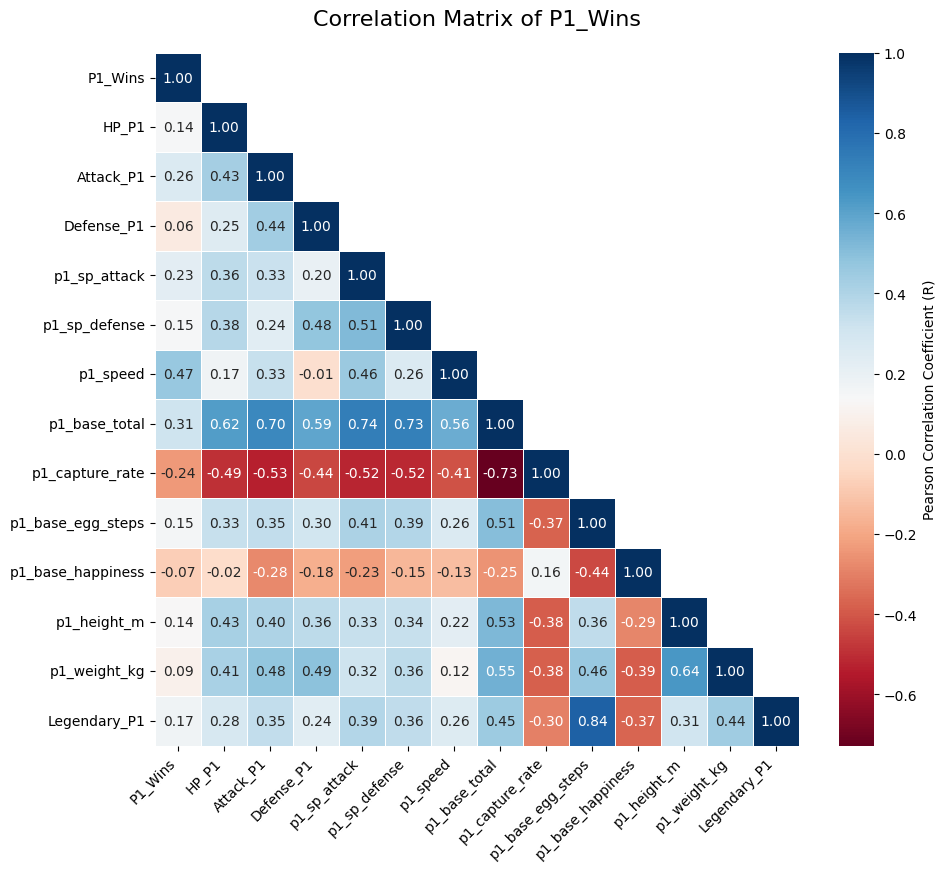

In [26]:
# Tạo tạm cột target để vẽ tương quan, không sử dụng sau này
df['P1_Wins'] = (df['Winner'] == df['First_pokemon']).astype(int)

COMBAT_TARGET_STATS = [
    'P1_Wins' ,
    'HP_P1', 'Attack_P1', 'Defense_P1', 'p1_sp_attack', 'p1_sp_defense', 'p1_speed', 'p1_base_total',
    'p1_capture_rate', 'p1_base_egg_steps', 'p1_base_happiness',
    'p1_height_m', 'p1_weight_kg', 'Legendary_P1' 
]

plot_correlation_matrix(
    df, 
    COMBAT_TARGET_STATS, 
    title='Correlation Matrix of P1_Wins'
)

### 1. Phân tích Tương quan với Mục tiêu (`P1_Wins`)

| Biến số | Hệ số Tương quan ($R$) | Nhận xét |
| :--- | :--- | :--- |
| **`p1_base_total`** | **$0.62$** | **Tương quan mạnh nhất.** Đây là cột duy nhất có $R > 0.5$, khẳng định tổng chỉ số là yếu tố dự đoán quan trọng nhất. |
| **`p1_speed`** | **$0.47$** | Tương quan mạnh vừa phải. Tốc độ là yếu tố dự đoán quan trọng thứ hai. |
| **`p1_attack`** | **$0.43$** | Tương quan vừa phải. Các chỉ số tấn công thường là yếu tố dự đoán quan trọng. |
| **`HP_P1`** | **$0.14$** | **Tương quan yếu.** HP (máu) ít quan trọng trong việc dự đoán chiến thắng hơn so với các chỉ số khác. |
| **`p1_base_egg_steps`** | **$0.07$** | **Tương quan cực kỳ yếu.** Gần như không có mối quan hệ tuyến tính nào với việc chiến thắng. |
| **`Legendary_P1`** | **$0.17$** | **Tương quan yếu bất ngờ.** Dù Legendaries rất mạnh, tương quan Pearson $R$ rất thấp. |


> Ngoài `p1_base_total`, **không có chỉ số nào khác** đạt mức tương quan mạnh ($R > 0.5$) với khả năng chiến thắng. Điều này cho thấy mô hình tuyến tính dựa trên các biến số thô này sẽ có **hiệu suất dự đoán kém**.

---

### 2. Dữ liệu Thô Che giấu Insight

Ma trận này minh họa rõ ràng lý do tại sao dữ liệu thô (chưa xử lý) lại kém hiệu quả trong việc dự đoán:

**Đa cộng tuyến nghiêm trọng (Severe Multicollinearity)**

Các cột chỉ số chiến đấu có **tương quan rất cao với nhau**:
* `p1_base_total` có $R=0.70$ với `p1_attack` và $R=0.74$ với `p1_defense`.
* `p1_attack` và `p1_sp_attack` có $R=0.58$.

* **Vấn đề:** Khi các biến độc lập tương quan quá cao (thường $R > 0.7$), chúng sẽ gây ra **Đa cộng tuyến (Multicollinearity)**. Điều này khiến mô hình (như hồi quy tuyến tính) bị **mất ổn định**, tăng phương sai và khó xác định được chỉ số nào thực sự quan trọng.

**B. Tương quan Bị Che Giấu do Skewness/Outliers**

Các giá trị tương quan thấp cho thấy dữ liệu đang che giấu mối quan hệ thực sự:

* **`Legendary_P1` ($R=0.17$):** Mặc dù Pokémon Legendary là nhóm có chỉ số cao nhất, tương quan thô lại rất yếu. Điều này là do **độ lệch lớn và outliers** kéo giá trị $R$ xuống, không nắm bắt được tác động nhân quả của việc là Legendary.
* **`p1_capture_rate` ($R=-0.24$):** Mặc dù đây là một biến số được biết là rất quan trọng (Pokémon khó bắt thường mạnh), tương quan tuyến tính vẫn ở mức yếu. Điều này là do bản chất **rời rạc và không đồng đều** của các mức bắt giữ.

**Tóm lại:** Ma trận này khẳng định rằng để đạt được hiệu suất dự đoán tốt, dữ liệu **bắt buộc phải qua bước tiền xử lý** (như biến đổi logarit cho các chỉ số chiến đấu và mã hóa cho các biến rời rạc/ordinal) để Pearson $R$ có thể phản ánh đúng mối quan hệ.